In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


Do cancer and then fill in germline/passenger

In [2]:
cancer_mut_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.all.csv', index_col=0)
cancer_aff_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.csv', index_col=0)
germline_mut_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.germline.all.csv', index_col=0)
germline_aff_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.germline.all.csv', index_col=0)
passenger_mut_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.passenger.csv', index_col=0)
passenger_aff_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.passenger.csv', index_col=0)

In [3]:
cancer_mutated = pd.Series(np.matrix(cancer_mut_df).flatten().tolist()[0]).astype(bool)
cancer_affinities = pd.Series(np.matrix(cancer_aff_df).flatten().tolist()[0])
germline_mutated = pd.Series(np.matrix(germline_mut_df).flatten().tolist()[0]).astype(bool)
germline_affinities = pd.Series(np.matrix(germline_aff_df).flatten().tolist()[0])
passenger_mutated = pd.Series(np.matrix(passenger_mut_df).flatten().tolist()[0]).astype(bool)
passenger_affinities = pd.Series(np.matrix(passenger_aff_df).flatten().tolist()[0])

In [4]:
plotting_df = pd.DataFrame({'PHBR': list(cancer_affinities[cancer_mutated]) + list(cancer_affinities[~cancer_mutated]) + list(germline_affinities[germline_mutated]) + list(germline_affinities[~germline_mutated]) + list(passenger_affinities[passenger_mutated]) + list(passenger_affinities[~passenger_mutated]),
                          'Mutation_status': ['Mutation' for x in cancer_affinities[cancer_mutated]] + ['No mutation' for x in cancer_affinities[~cancer_mutated]] + ['Mutation' for x in germline_affinities[germline_mutated]] + ['No mutation' for x in germline_affinities[~germline_mutated]] + ['Mutation' for x in passenger_affinities[passenger_mutated]] + ['No mutation' for x in passenger_affinities[~passenger_mutated]],
                          'Category': ['Recurrent cancer' for x in cancer_affinities] + ['Germline' for x in germline_affinities] + ['Passenger' for x in passenger_affinities]})

In [5]:
plotting_df.head()

,Category,Mutation_status,PHBR
0,Recurrent cancer,Mutation,20.358900
1,Recurrent cancer,Mutation,49.726220
2,Recurrent cancer,Mutation,35.103402
3,Recurrent cancer,Mutation,94.562212
4,Recurrent cancer,Mutation,29.880874


In [8]:
print len(plotting_df[(plotting_df.Category == 'Recurrent cancer')&(plotting_df.Mutation_status == 'Mutation')])
print len(plotting_df[(plotting_df.Category == 'Recurrent cancer')&(plotting_df.Mutation_status == 'No mutation')])
print len(plotting_df[(plotting_df.Category == 'Germline')&(plotting_df.Mutation_status == 'Mutation')])
print len(plotting_df[(plotting_df.Category == 'Germline')&(plotting_df.Mutation_status == 'No mutation')])
print len(plotting_df[(plotting_df.Category == 'Passenger')&(plotting_df.Mutation_status == 'Mutation')])
print len(plotting_df[(plotting_df.Category == 'Passenger')&(plotting_df.Mutation_status == 'No mutation')])

6139
4797062
1568760
1097240
1354
7135646


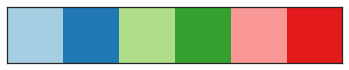

In [6]:
colors = ["windows blue", "amber", "greyish", "dark rose", "faded green", "dusty purple"]
sns.palplot(sns.color_palette("Paired"))

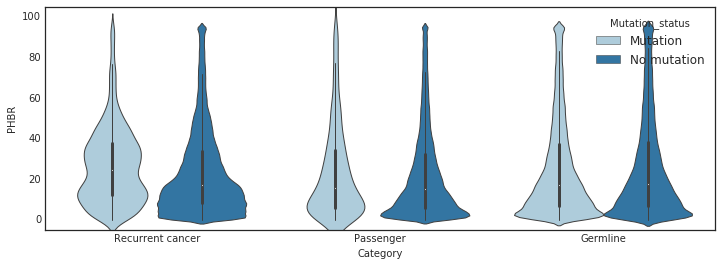

In [8]:
plt.figure(figsize=(12, 4))
sns.violinplot(x='Category', y='PHBR', hue='Mutation_status', data=plotting_df, 
               order=['Recurrent cancer', 'Passenger', 'Germline'], palette="Paired")
plt.ylim(-5, 105)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/all/distributions_with_controls.pdf')